In [2]:
# Step 1: Data Collection
# ------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set display options for clarity
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

# Load the dataset
df = pd.read_csv('./diabetes_012_health_indicators_BRFSS2015.csv')

# Display first five rows
df.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


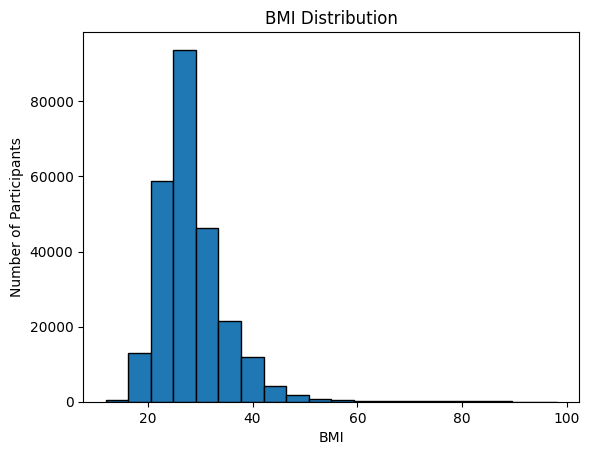

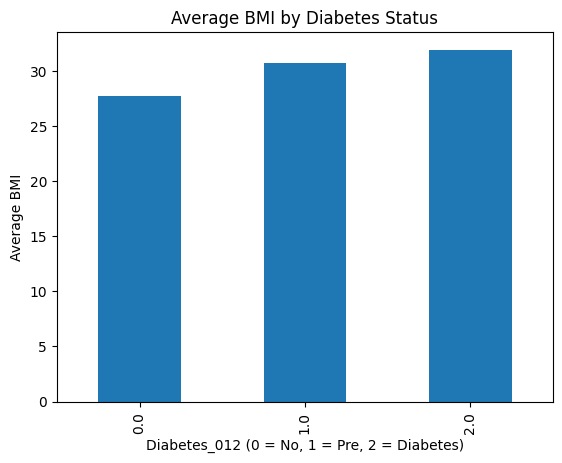

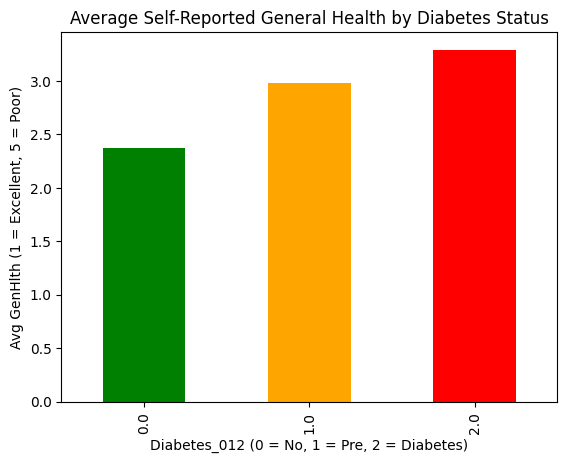

In [14]:
# Step 2: Data Visualization

# 1. Histogram: BMI distribution
plt.hist(df["BMI"], bins=20, edgecolor="black")
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Number of Participants")
plt.show()

# 2. Bar chart: Average BMI by Diabetes category
avg_bmi_by_diabetes = df.groupby("Diabetes_012")["BMI"].mean()

avg_bmi_by_diabetes.plot(kind="bar")
plt.title("Average BMI by Diabetes Status")
plt.xlabel("Diabetes_012 (0 = No, 1 = Pre, 2 = Diabetes)")
plt.ylabel("Average BMI")
plt.show()

# 3 Optional but General Health Rating vs Diabetes
avg_genhlth_by_diabetes = df.groupby("Diabetes_012")["GenHlth"].mean()
avg_genhlth_by_diabetes.plot(kind="bar", color=["green","orange","red"])
plt.title("Average Self-Reported General Health by Diabetes Status")
plt.xlabel("Diabetes_012 (0 = No, 1 = Pre, 2 = Diabetes)")
plt.ylabel("Avg GenHlth (1 = Excellent, 5 = Poor)")
plt.show()



In [ ]:
# Step 3: Data Preprocessing

# 3.1 Handling Missing Values

# Check missing values
print("Missing values per column BEFORE handling:")
print(df.isnull().sum())

# In this dataset, many columns are coded with 0/1 flags or category codes.
# It usually doesn't have NaN by default, but we'll simulate handling in case.

# Example: if there were missing values, we could fill them with column mean.
df_filled = df.copy()
df_filled = df_filled.fillna(df_filled.mean(numeric_only=True))

print("\nMissing values per column AFTER fillna with mean:")
print(df_filled.isnull().sum())


Missing values per column BEFORE handling:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Missing values per column AFTER fillna with mean:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealth

In [5]:
# 3.2 Outlier Detection and Removal using IQR (example focused on BMI)

Q1_BMI = df_filled["BMI"].quantile(0.25)
Q3_BMI = df_filled["BMI"].quantile(0.75)
IQR_BMI = Q3_BMI - Q1_BMI

lower_bound_BMI = Q1_BMI - 1.5 * IQR_BMI
upper_bound_BMI = Q3_BMI + 1.5 * IQR_BMI

print("BMI Q1:", Q1_BMI)
print("BMI Q3:", Q3_BMI)
print("BMI IQR:", IQR_BMI)
print("BMI lower bound:", lower_bound_BMI)
print("BMI upper bound:", upper_bound_BMI)

# Identify which rows are outliers by BMI
outlier_mask = (df_filled["BMI"] < lower_bound_BMI) | (df_filled["BMI"] > upper_bound_BMI)
print("\nNumber of BMI outliers:", outlier_mask.sum())

# Create a version with outliers removed
df_no_outliers = df_filled[~outlier_mask].copy()

print("Shape before outlier removal:", df_filled.shape)
print("Shape after outlier removal:", df_no_outliers.shape)


BMI Q1: 24.0
BMI Q3: 31.0
BMI IQR: 7.0
BMI lower bound: 13.5
BMI upper bound: 41.5

Number of BMI outliers: 9847
Shape before outlier removal: (253680, 22)
Shape after outlier removal: (243833, 22)


In [7]:
# 3.3 Data Reduction

# Sampling: keep 70% of the rows
df_sampled = df_no_outliers.sample(frac=0.7, random_state=42)

# Column reduction: drop a column that might be less directly important for a first-pass model
# We'll drop 'Fruits' (self-reported fruit consumption habit) just to demonstrate.
df_reduced = df_sampled.drop(columns=["Fruits"], errors="ignore")

print("Shape before reduction:", df_no_outliers.shape)
print("Shape after reduction:", df_reduced.shape)
df_reduced.head()


Shape before reduction: (243833, 22)
Shape after reduction: (170683, 21)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
72721,0.0,1.0,1.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,6.0,7.0
47974,2.0,1.0,0.0,1.0,35.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,14.0,30.0,0.0,1.0,13.0,4.0,5.0
99874,0.0,0.0,0.0,1.0,19.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,0.0,4.0,6.0,8.0
24883,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0,6.0,7.0
86528,2.0,1.0,1.0,1.0,34.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,1.0


In [8]:
# 3.4 Data Scaling (Min-Max Normalization)

df_scaled = df_reduced.copy()

numeric_cols = [col for col in df_scaled.columns 
                if col != "Diabetes_012" and (df_scaled[col].dtype == "float64" or df_scaled[col].dtype == "int64")]

for col in numeric_cols:
    col_min = df_scaled[col].min()
    col_max = df_scaled[col].max()
    df_scaled[col] = (df_scaled[col] - col_min) / (col_max - col_min)

df_scaled.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
72721,0.0,1.0,1.0,1.0,0.63,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.75,0.00,0.00,1.0,0.0,0.83,1.0,0.86
47974,2.0,1.0,0.0,1.0,0.78,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.00,0.47,1.00,0.0,1.0,1.00,0.6,0.57
99874,0.0,0.0,0.0,1.0,0.19,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.25,0.00,0.07,0.0,0.0,0.25,1.0,1.00
24883,0.0,0.0,0.0,1.0,0.26,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.00,0.00,0.00,0.0,1.0,0.58,1.0,0.86
86528,2.0,1.0,1.0,1.0,0.74,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.25,0.00,0.00,0.0,1.0,0.58,0.6,0.00


In [9]:
# Optional: Discretization example on BMI
# We'll create BMI_Category bins

df_scaled["BMI_Category"] = pd.cut(
    df_scaled["BMI"],
    bins=[0, 18.5, 25, 30, 100],
    labels=["Underweight/Low", "Normal", "Overweight", "Obese"]
)

df_scaled[["BMI", "BMI_Category"]].head()


,BMI,BMI_Category
72721,0.63,Underweight/Low
47974,0.78,Underweight/Low
99874,0.19,Underweight/Low
24883,0.26,Underweight/Low
86528,0.74,Underweight/Low


In [10]:
# 4.1 General Overview
print("Info for df_scaled:")
df_scaled.info()

print("\nDescribe for df_scaled:")
df_scaled.describe()


Info for df_scaled:
<class 'pandas.core.frame.DataFrame'>
Index: 170683 entries, 72721 to 108923
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   Diabetes_012          170683 non-null  float64 
 1   HighBP                170683 non-null  float64 
 2   HighChol              170683 non-null  float64 
 3   CholCheck             170683 non-null  float64 
 4   BMI                   170683 non-null  float64 
 5   Smoker                170683 non-null  float64 
 6   Stroke                170683 non-null  float64 
 7   HeartDiseaseorAttack  170683 non-null  float64 
 8   PhysActivity          170683 non-null  float64 
 9   Veggies               170683 non-null  float64 
 10  HvyAlcoholConsump     170683 non-null  float64 
 11  AnyHealthcare         170683 non-null  float64 
 12  NoDocbcCost           170683 non-null  float64 
 13  GenHlth               170683 non-null  float64 
 14  MentHlth         

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,170683.00,170683.00,170683.00,170683.00,170683.00,170683.00,170683.00,170683.00,170683.00,170683.00,170683.00,170683.00,170683.00,170683.00,170683.00,170683.00,170683.00,170683.00,170683.00,170683.00,170683.00
mean,0.28,0.42,0.42,0.96,0.50,0.44,0.04,0.09,0.76,0.81,0.06,0.95,0.08,0.37,0.10,0.14,0.16,0.45,0.59,0.81,0.73
std,0.68,0.49,0.49,0.19,0.18,0.50,0.20,0.29,0.42,0.39,0.23,0.21,0.27,0.26,0.24,0.29,0.36,0.50,0.26,0.20,0.29
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,1.00,0.37,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.25,0.00,0.00,0.00,0.00,0.42,0.60,0.57
50%,0.00,0.00,0.00,1.00,0.48,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.25,0.00,0.00,0.00,0.00,0.58,0.80,0.86
75%,0.00,1.00,1.00,1.00,0.63,1.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.50,0.07,0.10,0.00,1.00,0.75,1.00,1.00
max,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [16]:
# 4.2 Central Tendency

min_vals = df_scaled.min(numeric_only=True)
max_vals = df_scaled.max(numeric_only=True)
mean_vals = df_scaled.mean(numeric_only=True)
median_vals = df_scaled.median(numeric_only=True)
mode_vals = df_scaled.mode().iloc[0]

print("Minimum:\n", min_vals)
print("\nMaximum:\n", max_vals)
print("\nMean:\n", mean_vals)
print("\nMedian:\n", median_vals)
print("\nMode:\n", mode_vals)


Minimum:
 Diabetes_012            0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

Maximum:
 Diabetes_012            2.0
HighBP                  1.0
HighChol                1.0
CholCheck               1.0
BMI                     1.0
Smoker                  1.0
Stroke                  1.0
HeartDiseaseorAttack    1.0
PhysActivity            1.0
Veggies                 1.0
HvyAlcoholConsump       1.0
AnyHealthcare           1.0
NoDocbcCost             1.0
GenHlth     

In [15]:
# 4.3 Dispersion Measures

range_vals = max_vals - min_vals
variance_vals = df_scaled.var(numeric_only=True)
std_dev_vals = df_scaled.std(numeric_only=True)
Q1 = df_scaled.quantile(0.25, numeric_only=True)
Q3 = df_scaled.quantile(0.75, numeric_only=True)
IQR_vals = Q3 - Q1

print("Range:\n", range_vals)
print("\nVariance:\n", variance_vals)
print("\nStandard Deviation:\n", std_dev_vals)
print("\nInterquartile Range (IQR):\n", IQR_vals)


Range:
 Diabetes_012            2.0
HighBP                  1.0
HighChol                1.0
CholCheck               1.0
BMI                     1.0
Smoker                  1.0
Stroke                  1.0
HeartDiseaseorAttack    1.0
PhysActivity            1.0
Veggies                 1.0
HvyAlcoholConsump       1.0
AnyHealthcare           1.0
NoDocbcCost             1.0
GenHlth                 1.0
MentHlth                1.0
PhysHlth                1.0
DiffWalk                1.0
Sex                     1.0
Age                     1.0
Education               1.0
Income                  1.0
dtype: float64

Variance:
 Diabetes_012            0.46
HighBP                  0.24
HighChol                0.24
CholCheck               0.04
BMI                     0.03
Smoker                  0.25
Stroke                  0.04
HeartDiseaseorAttack    0.08
PhysActivity            0.18
Veggies                 0.15
HvyAlcoholConsump       0.05
AnyHealthcare           0.05
NoDocbcCost             0.08


In [13]:
# 4.4 Correlation Matrix

corr_matrix = df_scaled.corr(numeric_only=True)
corr_matrix


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,1.00,2.65e-01,2.05e-01,6.68e-02,2.19e-01,0.06,1.06e-01,0.18,-1.13e-01,-5.80e-02,-5.47e-02,1.87e-02,3.22e-02,2.94e-01,0.07,1.64e-01,0.21,3.97e-02,1.90e-01,-1.26e-01,-0.16
HighBP,0.26,1.00e+00,2.98e-01,9.69e-02,2.27e-01,0.10,1.31e-01,0.21,-1.18e-01,-5.78e-02,-9.45e-05,4.13e-02,1.34e-02,2.93e-01,0.05,1.53e-01,0.21,5.74e-02,3.50e-01,-1.38e-01,-0.16
HighChol,0.21,2.98e-01,1.00e+00,8.64e-02,1.32e-01,0.09,9.24e-02,0.18,-7.62e-02,-4.02e-02,-1.07e-02,4.65e-02,9.53e-03,2.09e-01,0.06,1.18e-01,0.14,3.60e-02,2.75e-01,-7.00e-02,-0.08
CholCheck,0.07,9.69e-02,8.64e-02,1.00e+00,3.80e-02,-0.01,2.46e-02,0.04,7.47e-03,8.49e-03,-2.25e-02,1.21e-01,-5.85e-02,4.36e-02,-0.01,2.86e-02,0.04,-2.31e-02,9.04e-02,3.09e-03,0.02
BMI,0.22,2.27e-01,1.32e-01,3.80e-02,1.00e+00,0.02,2.00e-02,0.06,-1.29e-01,-6.33e-02,-4.68e-02,-7.61e-03,4.34e-02,2.20e-01,0.06,8.33e-02,0.15,9.70e-02,-4.12e-03,-1.05e-01,-0.07
Smoker,0.06,9.99e-02,9.23e-02,-1.05e-02,2.36e-02,1.00,6.26e-02,0.12,-9.04e-02,-3.26e-02,1.03e-01,-2.62e-02,5.03e-02,1.69e-01,0.09,1.17e-01,0.12,9.42e-02,1.23e-01,-1.64e-01,-0.12
Stroke,0.11,1.31e-01,9.24e-02,2.46e-02,2.00e-02,0.06,1.00e+00,0.20,-6.94e-02,-4.05e-02,-1.63e-02,9.92e-03,3.20e-02,1.80e-01,0.07,1.54e-01,0.18,3.74e-03,1.28e-01,-7.75e-02,-0.13
HeartDiseaseorAttack,0.18,2.08e-01,1.81e-01,4.35e-02,5.84e-02,0.12,2.04e-01,1.00,-8.47e-02,-3.79e-02,-2.84e-02,2.05e-02,3.10e-02,2.61e-01,0.06,1.82e-01,0.21,8.70e-02,2.23e-01,-1.00e-01,-0.14
PhysActivity,-0.11,-1.18e-01,-7.62e-02,7.47e-03,-1.29e-01,-0.09,-6.94e-02,-0.08,1.00e+00,1.53e-01,1.06e-02,3.81e-02,-5.97e-02,-2.57e-01,-0.12,-2.10e-01,-0.24,2.76e-02,-9.51e-02,1.98e-01,0.19
Veggies,-0.06,-5.78e-02,-4.02e-02,8.49e-03,-6.33e-02,-0.03,-4.05e-02,-0.04,1.53e-01,1.00e+00,2.10e-02,3.00e-02,-3.29e-02,-1.23e-01,-0.06,-6.34e-02,-0.08,-6.82e-02,-1.18e-02,1.53e-01,0.15
